In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, pickle
import sys
sys.path.append("../")

from general.utils import load_json
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
dataset = 'lawschool'

 load:  DRO_512_adam5e6_CE_seed42_split1_eta0


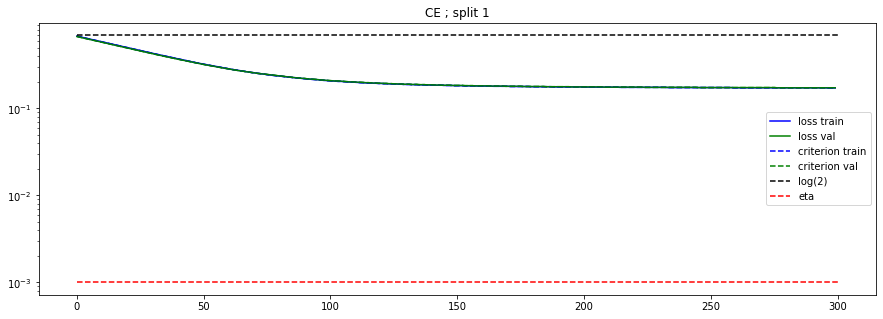

 load:  DRO_512_adam5e6_CE_seed42_split1_eta1


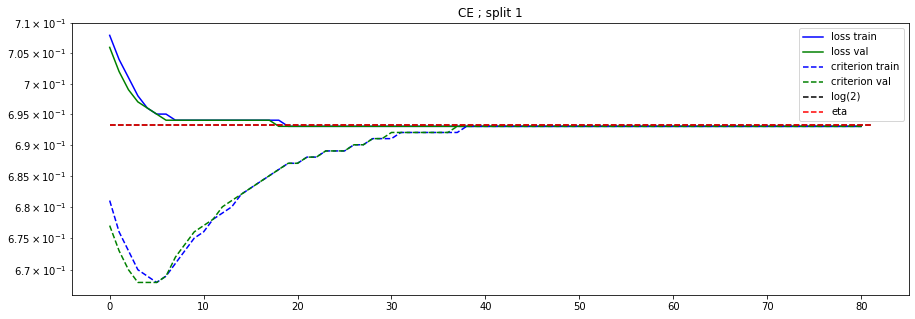

 load:  DRO_512_adam5e6_CE_seed42_split1_eta01


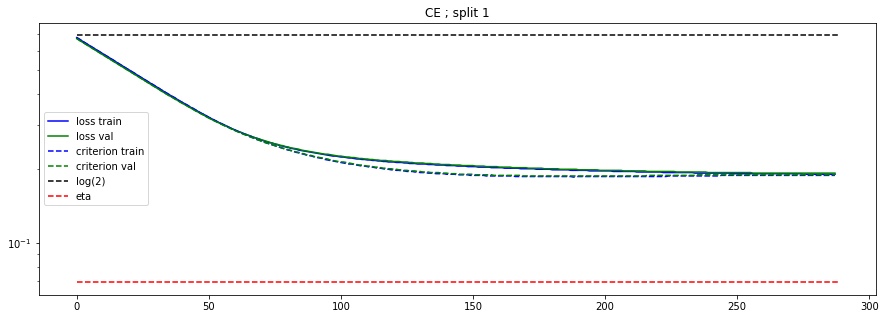

 load:  DRO_512_adam5e6_CE_seed42_split1_eta02


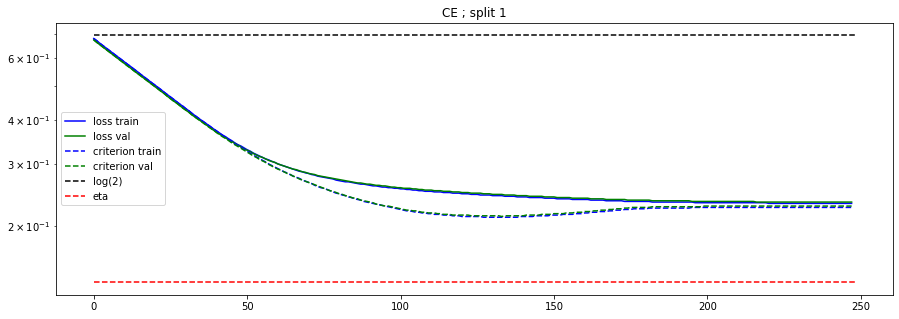

 load:  DRO_512_adam5e6_CE_seed42_split1_eta03


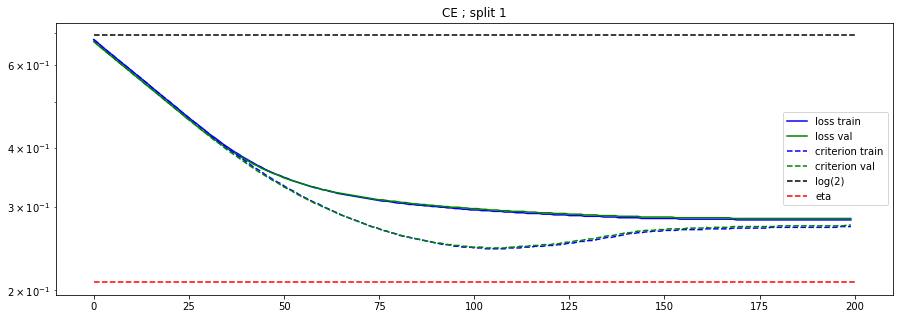

 load:  DRO_512_adam5e6_CE_seed42_split1_eta04


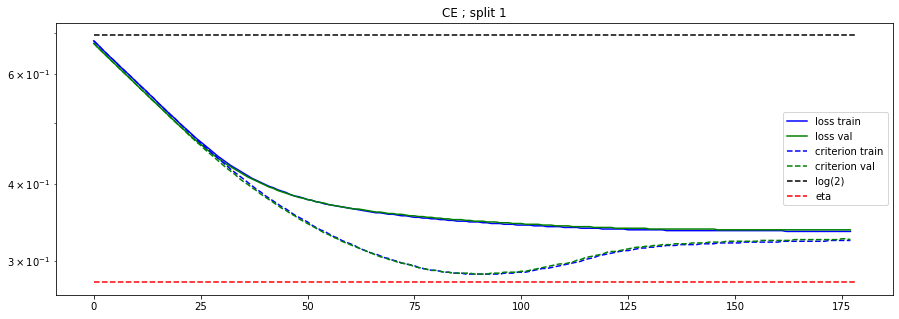

 load:  DRO_512_adam5e6_CE_seed42_split1_eta05


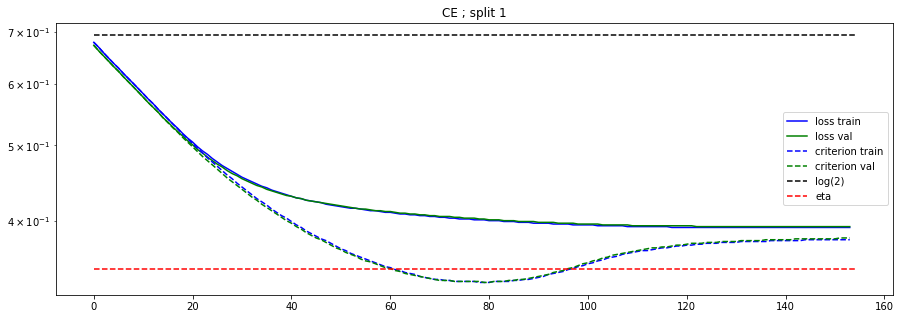

 load:  DRO_512_adam5e6_CE_seed42_split1_eta06


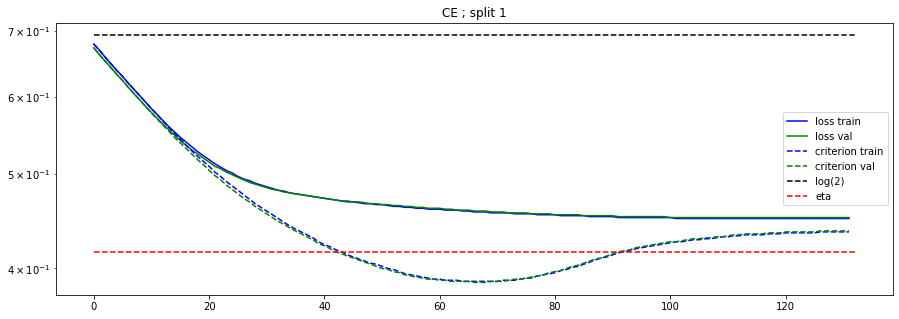

 load:  DRO_512_adam5e6_CE_seed42_split1_eta07


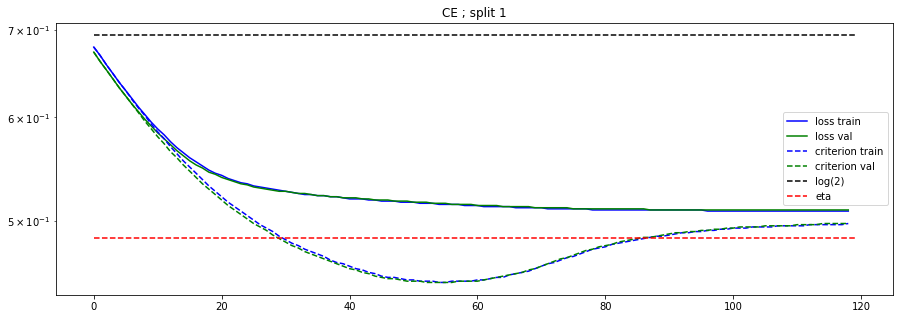

 load:  DRO_512_adam5e6_CE_seed42_split1_eta08


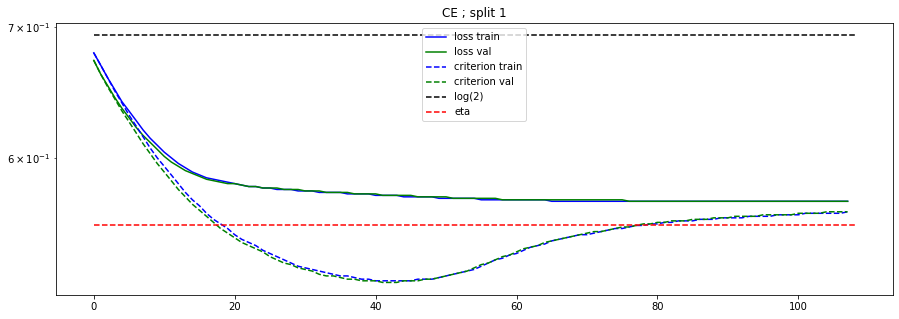

 load:  DRO_512_adam5e6_CE_seed42_split1_eta09


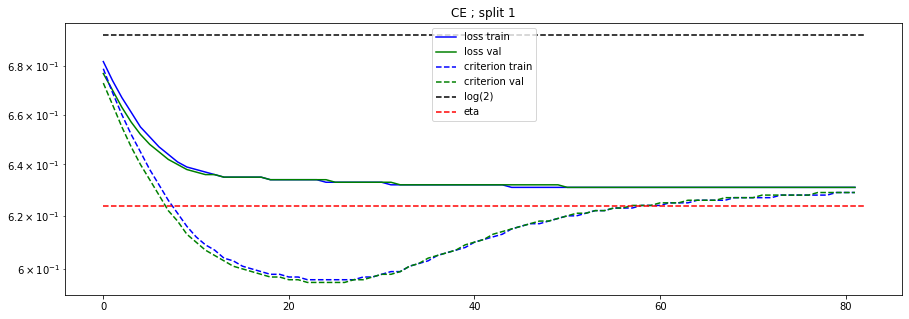

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

### 
Not found files : !!!!!!! 
DRO_512_adam5e6_CE_seed42_split1_eta015
DRO_512_adam5e6_CE_seed42_split1_eta025
DRO_512_adam5e6_CE_seed42_split1_eta035
DRO_512_adam5e6_CE_seed42_split1_eta045
DRO_512_adam5e6_CE_seed42_split1_eta055
DRO_512_adam5e6_CE_seed42_split1_eta065
DRO_512_adam5e6_CE_seed42_split1_eta075
DRO_512_adam5e6_CE_seed42_split1_eta085
DRO_512_adam5e6_CE_seed42_split1_eta095


In [21]:
basedir = '/data/natalia/models/'+dataset+'/DRO/'

model_name_prefix = 'DRO_512_adam5e6_'

seed = 42
loss = 'CE'

eta_dic={'1':1, '05':0.5,'0':0}
eta_dic={'0':0, '05':0.5, '06':0.6,  '07':0.7, '08':0.8, '09':0.9, '1':1}
eta_dic={'0':0, '1':1, '01':0.1, '02':0.2, '03':0.3, '04':0.4,'05':0.5,
         '06':0.6,  '07':0.7, '08':0.8, '09':0.9,'015':0.15, '025':0.25, '035':0.35, '045':0.45,
         '055':0.55, '065':0.65,  '075':0.75, '085':0.85, '095':0.95} #eta = eta_coeff * max(eta) (e.g.: eta_coeff * np.log(2) if CE)

# eta_dic={'1':1} 

split_list = [1,2,3,4,5]
split_list = [1]
nofiles_list = []

pd_summary = None
for eta_str in eta_dic.keys():
    plt.figure(figsize=(15,5))
    for split in split_list:
        model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
                                 str(split) + '_eta' + eta_str
        if os.path.exists(basedir+model_name+'/pd_summary_results.csv'):
            
            config = load_json(basedir+model_name+'/config.json')
            history = load_json(basedir+model_name+'/history.json')
            pd_summary_ix = pd.read_csv(basedir+model_name+'/pd_summary_results.csv')
            if pd_summary is None:
                pd_summary = pd_summary_ix.copy()
            else:
                pd_summary = pd.concat([pd_summary,pd_summary_ix],axis = 0)

            print(' load: ',model_name)
            
            plt.subplot(1,len(split_list),split)
            plt.title(loss + ' ; split ' + str(split))
            plt.semilogy(history['loss_train'],'b',label = 'loss train')
            plt.semilogy(history['loss_val'],'g',label = 'loss val')

            plt.semilogy(history['criterion_train'],'b--',label = 'criterion train')
            plt.semilogy(history['criterion_val'],'g--',label = 'criterion val')

            plt.semilogy([0,len(history['criterion_train'])],[ np.log(2), np.log(2)],'k--',label = 'log(2)')
            plt.semilogy([0,len(history['criterion_train'])],[ np.maximum(config['eta'],1e-3),np.maximum(config['eta'],1e-3)],'r--',label = 'eta')

            plt.legend()

        else:
            nofiles_list.append(model_name)
    plt.show()

if len(nofiles_list)>0:
    print('### ')
    print('Not found files : !!!!!!! ')
    for file in nofiles_list:
        print(file)

train


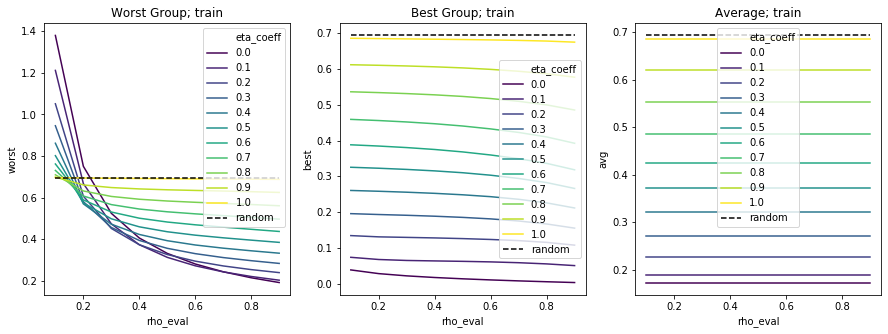

val


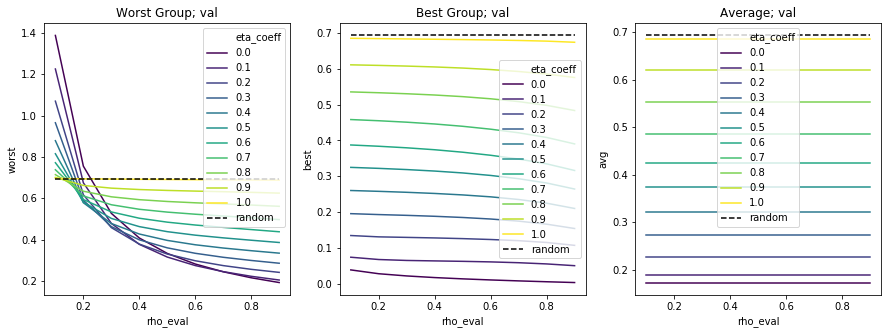

test


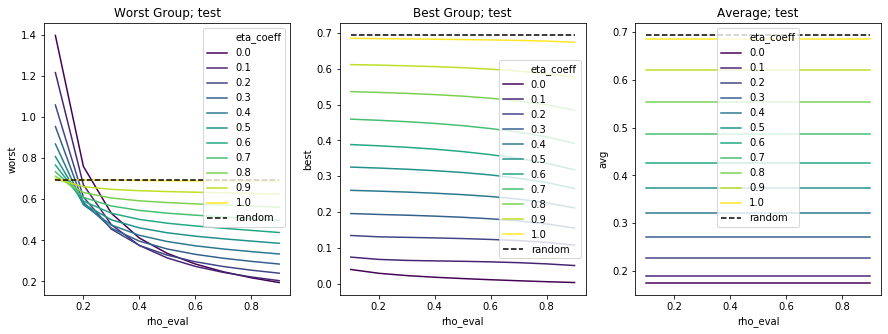

In [25]:
metric = 'ce'

from matplotlib import cm
cm_function = cm.bwr
cm_function = cm.viridis
icolor = [50,255]
param_tag = 'eta_coeff'
colors_list = np.linspace(icolor[0], icolor[1], len(pd_summary[param_tag].unique())).astype('int')


for dataset in ['train','val','test']:
    pd_aux = pd_summary.loc[(pd_summary.dataset == dataset) & (pd_summary.metric == metric)]
    
    if metric == 'softerr':
        value_random = 0.5
    else:
        value_random = np.log(2)
    print(dataset)
#     print(pd_aux['avg'].mean())
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('Worst Group; '+dataset)
    import seaborn as sns
    sns.lineplot(data=pd_aux,x='rho_eval',y='worst',
                 hue =param_tag,palette=cm_function,legend='full')
    
#     sns.lineplot(data=pd_aux,x='rho_eval',y='worst',legend='full',style=param_tag)
    
#     ix = 0
#     for rho in pd_aux['rho_model'].unique():
#         pd_plot = pd_aux.loc[(pd_aux.rho_model == rho)]
#         sns.lineplot(data=pd_plot,x='rho_eval',y='worst',
#                      label = str(rho),color=cm_function(colors_list[ix]))
#         ix += 1


        
    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.title('Best Group; '+dataset)
    sns.lineplot(data=pd_aux,x='rho_eval',y='best',
                 hue =param_tag,palette=cm_function,legend='full')
    
#     sns.lineplot(data=pd_aux,x='rho_eval',y='best',legend='full',style=param_tag)
#     ix = 0
#     for rho in pd_aux['rho_model'].unique():
#         pd_plot = pd_aux.loc[(pd_aux.rho_model == rho)]
#         sns.lineplot(data=pd_plot,x='rho_eval',y='best',label = str(rho),
#                      color=cm_function(colors_list[ix]))
#         ix += 1

    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.title('Average; '+dataset)
    sns.lineplot(data=pd_aux,x='rho_eval',y='avg',
                 hue =param_tag,palette=cm_function,legend='full')
    
#     sns.lineplot(data=pd_aux,x='rho_eval',y='avg',legend='full',style=param_tag)
#     ix = 0
#     for rho in pd_aux['rho_model'].unique():
#         pd_plot = pd_aux.loc[(pd_aux.rho_model == rho)]
#         sns.lineplot(data=pd_plot,x='rho_eval',y='avg',label = str(rho),
#                      color=cm_function(colors_list[ix]))
#         ix += 1

    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    plt.show()


In [22]:
from general.evaluation import get_best_model
pd_out = get_best_model(pd_summary, model_tag='eta', dataset_choice=['train', 'val'], precision=3)

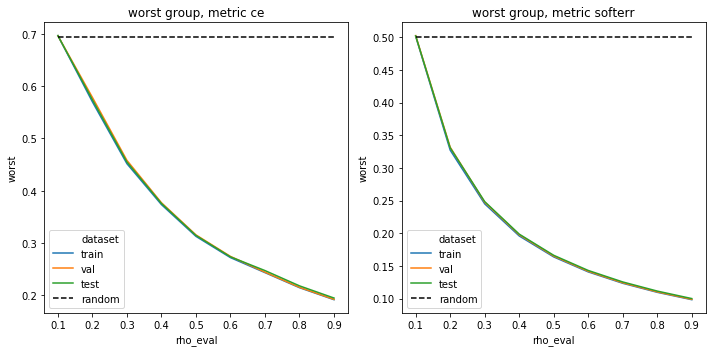

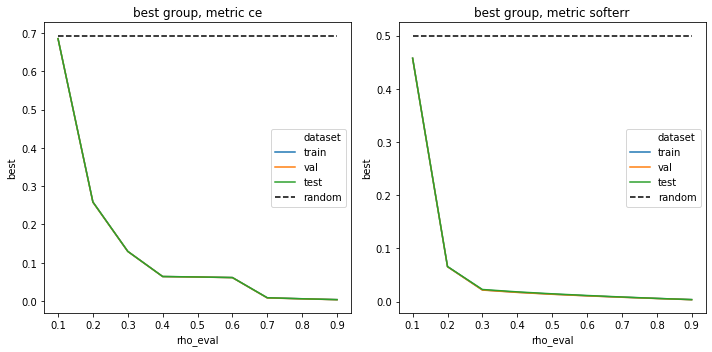

In [23]:
for group in ['worst','best']:
    plt.figure(figsize=(10,5))
    ix = 1
    for metric in ['ce','softerr']:

        if (metric == 'softerr') | (metric == 'err'):
            value_random = 0.5
        else:
            value_random = np.log(2)

        plt.subplot(1,2,ix)
        ix += 1

        pd_aux = pd_out.loc[(pd_out.metric == metric)]
        plt.title(group + ' group, metric '+metric)
        sns.lineplot(data = pd_aux, x = 'rho_eval',y=group,hue='dataset')
        plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
                 [value_random,value_random],'k--',label = 'random')
        plt.legend()
#         plt.yscale('log')
    plt.tight_layout()
    plt.show()
print()
print()


In [24]:
pd_out

,dataset,metric,rho_eval,worst,best,avg,split,eta,eta_coeff
0,train,ce,0.1,0.696588,0.685213,0.686351,1,0.693147,1.0
36,val,ce,0.1,0.696356,0.685145,0.686265,1,0.693147,1.0
72,test,ce,0.1,0.696511,0.685235,0.686362,1,0.693147,1.0
1,train,ce,0.2,0.569991,0.258360,0.320686,1,0.277259,0.4
37,val,ce,0.2,0.578523,0.258045,0.322117,1,0.277259,0.4
...,...,...,...,...,...,...,...,...,...
70,val,softerr,0.8,0.110241,0.005688,0.089319,1,0.000000,0.0
106,test,softerr,0.8,0.111464,0.005943,0.090360,1,0.000000,0.0
35,train,softerr,0.9,0.098294,0.003657,0.088830,1,0.000000,0.0
71,val,softerr,0.9,0.098861,0.003498,0.089319,1,0.000000,0.0
